<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Выделим-квартиры-в-Санкт-Петербурге-и-выясним,-какая-область-из-них-входит-в-центр" data-toc-modified-id="Выделим-квартиры-в-Санкт-Петербурге-и-выясним,-какая-область-из-них-входит-в-центр-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Выделим квартиры в Санкт-Петербурге и выясним, какая область из них входит в центр</a></span></li><li><span><a href="#Проанализируем-центр-города-по-параметрам-площадь,-цена,-число-комнат,-высота-потолков.-Изучим-факторы,-влияющие-на-стоимость-квартиры.-Посмотрим,-отличаются-ли-они-об-общих-выводов-по-городу." data-toc-modified-id="Проанализируем-центр-города-по-параметрам-площадь,-цена,-число-комнат,-высота-потолков.-Изучим-факторы,-влияющие-на-стоимость-квартиры.-Посмотрим,-отличаются-ли-они-об-общих-выводов-по-городу.-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Проанализируем центр города по параметрам площадь, цена, число комнат, высота потолков. Изучим факторы, влияющие на стоимость квартиры. Посмотрим, отличаются ли они об общих выводов по городу.</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
#%pip install --upgrade pip

In [2]:
#%pip install -q -r requirements.txt

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [3]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# считываем файл с данными
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except FileNotFoundError:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
# просматриваем общую информацию по файлу
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
# просмотрим основные показатели по каждому столбцу
df.describe(include='all')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,2775,...,21421.000000,12180.000000,23650,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,...,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.858475,6.541549e+06,60.348651,NaN,2.070636,2.771499,10.673824,34.457852,5.892358,NaN,...,10.569807,1.150082,NaN,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,NaN,...,5.905438,1.071300,NaN,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,...,1.300000,0.000000,NaN,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,NaN,1.000000,2.520000,5.000000,18.600000,2.000000,NaN,...,7.000000,0.000000,NaN,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,...,9.100000,1.000000,NaN,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,NaN,3.000000,2.800000,16.000000,42.300000,8.000000,NaN,...,12.000000,2.000000,NaN,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000


In [7]:
# проверяем дубликаты
df.duplicated().sum()

0

### Вывод

В загруженных архивных данных всего 22 столбца, 23699 количество записей.

На первый взгляд вызывают вопросы столбцы:
* `ceiling_height` - по спецификации это высота потолков в метрах. Есть явно выбивающие значения высоты и порядка 40% отсутствующих значений, в чем стоит разобраться.
* `floors_total` - количество этажей в доме. Есть небольшое количество пустых значений. Значения типа float, в котором нет необходимости, так как количество этажей целое число.
* `living_area` - кроме нескольких отсутствующих значений, не видно вопросов. 
* `kitchen_area` - есть несколько тысяч отсутствующих значений. Интересно посмотреть на данные min и max площади кухни.
* `balcony` - число балконов, приведём тип в целое число, так как балконы могут быть только целыми. Половина данных пропущена.
* `airports_nearest` - расстояние до ближайшего аэропорта в метрах. Без отклонений, кроме 20% отсутствующих значений.
* `cityCenters_nearest` - название столбца не в стиле snake case, дальше переименуем столбец. Есть 20% отсутствующих значений.
* `parks_around3000` - число парков в радиусе 3 км. Значения типа float, в котором нет неоходимости, так как количество целое число. Поменяем далее на тип int. Есть явная корреляция  по количеству пропущенных значений со столбцами **cityCenters_nearest** и **ponds_around3000**.
* `ponds_around3000` - число водоемов в радиусе 3 км. Такие же вопросы, как и выше озвученные по столбцу **parks_around3000**.
* `parks_nearest` - расстояние до ближайшего парка в метрах. Есть много отсутствующих значений.
* `ponds_nearest` - расстояние до ближайшего водоёма в метрах. Есть много отсутствующих значений.
* `days_exposition` - количество дней размещения объявления (от публикации до снятия). Логичнее перевести значения в тип Int. Есть некоторое количество отсутствующих значений.
* `first_day_exposition` - дата публикации объявления. Здесь явно указана дата публикации и через разделитель Т нули времени, поэтому переведем далее столбец явно в дату.
* `is_apartment` - аппартаменты(булев). Из заполненных значений подавляющее большинство значений False. Тип объект, который логично перевести в тип булев и заполнить оставшиеся значения.

Данных достаточно для проведения исследования.

## Предобработка данных

Исследуем данные по каждому столбцу, к которому у нас были вопросы при первичном изучении файла с данными. Изучим пропущенные значения и приведем данные к логичным типам, как мы определили ранее.

У нас много не заполненных данных по высоте потолка. Очевидно они просто не были внесены в базу по причине отсутствия данных на момент публикации или по ещё иным похожим причинам, поэтому мы можем заменить их на медианное значение

In [8]:
# напишем функцию на вход которой подаётся столбец датафрейма и функция и она заполняем пропущенные значениями применения функции к столбцу
def filling_column(column):
    func_column = df['column'].median()
    df['column'] = df['column'].fillna(func_column)    

In [9]:
# заполняем пропуски в высоте потолка значения NaN медианным значением
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()
# проверили, что все пропуски заменились
df['ceiling_height'].isna().sum()

0

In [10]:
# заменим столбец количество этажей на тип int вместо float
df['floors_total'] = df['floors_total'].astype('Int16')
# посмотрим на пропуски по столбцу количеству этажей в доме 
df[df['floors_total'].isna() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Пропущенные значения количества этажей нет подходящего значения на замену, поэтому оставим эти значения как есть

In [11]:
# функция высчитывает по столбцу area медиану процентного отношения к столбцу total_area
def fill_area(area):
    for i in df.columns:
        if i == area:
            median_area = (df[i] / df['total_area']).median() # считает медиану 
            df.loc[df[i].isna(), i] = df['total_area'] * median_area # заполняет пропуски медианным значениеми
            return df[i].isna().sum() # проверяем, что все пропуски заполнились и нет пустых значений       

Так как жилая площадь и площадь кухни явно должна коррелировать с общей площадью, посчитаем медиану отношений каждой из площадей жилой к общей и кухонной к общей и заполним пропуски этими медианными значениями отношений.

In [12]:
# функция считаем медиану отношений жилой площади к общей и заполняет пропущенные значения в столбце жилая площать этим значением и 
#проверяем, что нет пустых значений
fill_area('living_area')

0

In [13]:
# функция считаем медиану отношений кухонной площади к общей и заполняет пропущенные значения в столбце кухонная площать этим значением и 
#проверяем, что нет пустых значений
fill_area('kitchen_area')

0

In [14]:
# приведем тип столбца балконы к целому Int8, так как нет нужды в больших числах, число балконов небольшое число
df['balcony'] = df['balcony'].astype('Int8')
# заполним пропущенные значения балконов нулем, так как, если не указали число балконов, то скорее всего их нет
df.loc[df['balcony'].isna(), 'balcony'] = 0
# проверяем, что замена произошла корректно
df['balcony'].isna().sum()

0

In [15]:
# проверим коррелицию между собой незаполненных картографических данных, если какие зацепки и связи
df[['ponds_around3000', 'parks_around3000', 'ponds_nearest', 'parks_nearest', 'cityCenters_nearest']].corr()

,ponds_around3000,parks_around3000,ponds_nearest,parks_nearest,cityCenters_nearest
ponds_around3000,1.000000,0.304316,-0.341840,0.077280,-0.074577
parks_around3000,0.304316,1.000000,-0.167103,-0.259514,-0.161738
ponds_nearest,-0.341840,-0.167103,1.000000,0.000692,0.028903
parks_nearest,0.077280,-0.259514,0.000692,1.000000,-0.040650
cityCenters_nearest,-0.074577,-0.161738,0.028903,-0.040650,1.000000


Так как линейной корреляции никакой не обнаружилось в картографических данных, самый подходящий вариант будет заполнить недостающие данные по медианным значениям с группировкой по населенным пунктам. Займемся столбцом locality_name, после его обработки, заполним недостающие картографические данные.

In [16]:
# изменим название столбца в общепринятый вид
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [17]:
# считаем количество пропущенных значений названия населенного пункта
df['locality_name'].isna().sum()

49

In [18]:
# пропущенных значений населенного пункта немного от общего числа и мы можем их безболезненно удалить, так как заменить их нечем
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

In [19]:
# посмотрим уникальные значения
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [20]:
# заменим в названиях местности поселок на посёлок, так как это одно и тоже
print(f'Уникальных значений до изменения названия {len(df["locality_name"].unique())}')
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
print(f'Уникальных значений после изменения названия {len(df["locality_name"].unique())}')

Уникальных значений до изменения названия 364
Уникальных значений после изменения названия 330


In [21]:
# приведем тип столбца балконы к целому Int16, так как нет нужды в больших числах, число балконов небольшое число
df['balcony'] = df['balcony'].astype('Int16')

Картографические данные содержат большое количество пропусков. Большое количество пустых значений возможно вызвано не полным соответствием вводимыми населенными пунктами, анализом программы подсчёта и багами. Заполним пропуски по группировке по населенным пунктам медианой, где это возможно, а если не возможно по общей медиане

In [22]:
# функция высчитывает медиану по заполненным значениям городов, а если их нет, то берёт медиану всех данных и заполняет 
# оставшиеся данные столбца 
def fill_cartographic_data(column):
# проверяем условие наличия столбца и даём доступ к датафрейму
    for i in df.columns:
        if i == column:
# проходим в цикле уникальные значения населенных пунктов, считаем медиану по входному столбцу по и заполняем этими значениями медианой
# по городам
            for data in df['locality_name'].unique():
                median = df.loc[df['locality_name'] == data, i].median()
                df.loc[(df[i].isna()) & (df['locality_name'] == data), i] = median
# считаем значение общей медианы по входящему столбцу
            df_cartographic_data_median_general = df[i].median()
# заполняем значеним общей медианы оставшиеся пустые значения, которые не заполнились сразу
            df.loc[df[i].isna(), i] = df_cartographic_data_median_general                                                           

In [23]:
# заполняем пустые значения в картографических данных
fill_cartographic_data('ponds_nearest')
fill_cartographic_data('parks_nearest')
fill_cartographic_data('parks_around3000')
fill_cartographic_data('ponds_around3000')
fill_cartographic_data('city_centers_nearest')
fill_cartographic_data('airports_nearest')

In [24]:
# заполним пропущенные значения в столбце is_apartment и переведём в булев тип. Значения заполняем False, так как если не заполнено
# поле апартаментов, то их с большой вероятностью нет
df.loc[df['is_apartment'].isna(),'is_apartment'] = False
df['is_apartment'] = df['is_apartment'].astype('bool')

In [25]:
df['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

In [26]:
# перевод даты в привычный формат
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Мы преобработали данные, заполнили недостающие значения, изменили тип данных в некоторых столбцах и готовы к дальнейшему исследованию.

## Расчёты и добавление результатов в таблицу

In [27]:
# посчитаем цену квадратного метра жилья в отдельный столбец
df['price_m2'] = df['last_price'] // df['total_area'] 

In [28]:
# добавляем столбец день недели в таблицу
df['weekday'] = df['first_day_exposition'].dt.weekday
# добавляем столбец месяц в таблицу
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
# добавляем столбец год в таблицу
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [29]:
# добавим столбец в таблицу с данными по этажам (первый, последний, другой) в зависимости от расположения
df.loc[df['floor'] == 1, 'floor_range'] = 'первый'
df.loc[~(df['floor_range'] == 'первый') & (df['floor'] == df['floors_total']), 'floor_range'] = 'последний'
df.loc[~(df['floor_range'] == 'первый') & ~(df['floor_range'] == 'последний'), 'floor_range'] = 'другой'

In [30]:
# добавим столбцы соотношения жилой и общей площади и отношение площади кухни к общей
df['living_total_area'] = round(df['living_area'] / df['total_area'], 2)
df['kitchen_total_area'] = round(df['kitchen_area'] / df['total_area'], 2)

Мы добавили столбцы в таблицу, необходимые для дальнейшего исследования и переходим к исследовательскому анализу данных

## Исследовательский анализ данных

In [31]:
# описательные характеристики параметров по квартирам (площадь, цена, цена за м2, количество комнат, высота потолков)
df[['total_area', 'last_price', 'price_m2', 'rooms', 'ceiling_height', 'days_exposition']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,23650.0,6.032907e+01,3.566181e+01,12.0,40.00,52.00,69.7,900.0
last_price,23650.0,6.541127e+06,1.089640e+07,12190.0,3400000.00,4650000.00,6799000.0,763000000.0
price_m2,23650.0,9.943180e+04,5.033794e+04,111.0,76614.25,95000.00,114274.0,1907500.0
rooms,23650.0,2.070106e+00,1.078620e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,23650.0,2.724311e+00,9.892549e-01,1.0,2.60,2.65,2.7,100.0
days_exposition,20470.0,1.807532e+02,2.197779e+02,1.0,45.00,95.00,231.0,1580.0


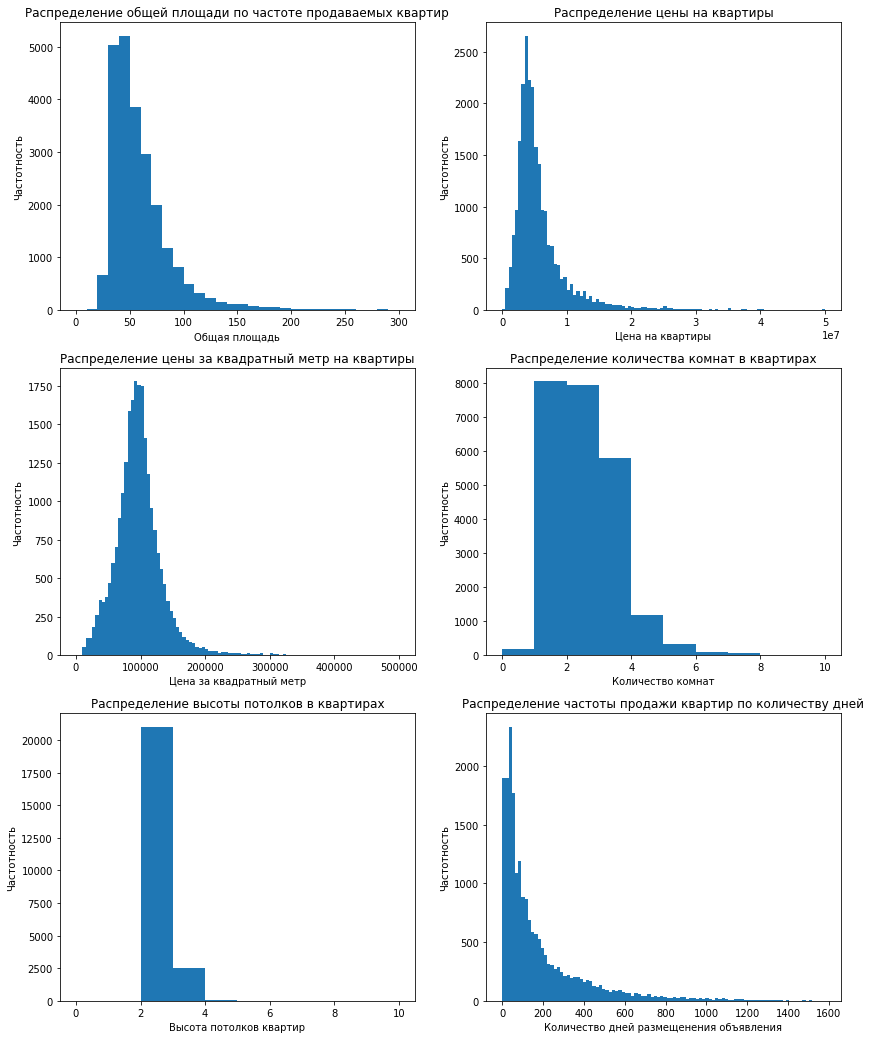

In [32]:
# функция строящая гистрограмму по вводным данным
def flat_hist(df, column, bins, max_range, axes_row, axes_col, title='', xlabel='', ylabel=''):
    axes[axes_row][axes_col].hist(df[column], bins=bins, range=(0,max_range))
    axes[axes_row][axes_col].set(title=title)
    axes[axes_row][axes_col].set(xlabel=xlabel)
    axes[axes_row][axes_col].set(ylabel=ylabel);

fig, axes = plt.subplots(3 ,2)
fig.set_figwidth(14)
fig.set_figheight(18)

# стоим гистограмму общей площади
flat_hist(df, 'total_area', 30, 300, 0, 0, \
          'Распределение общей площади по частоте продаваемых квартир', 'Общая площадь', 'Частотность')

# стоим гистограмму цены цены на момент снятия с публикации
flat_hist(df, 'last_price', 100, 50000000, 0, 1, \
          'Распределение цены на квартиры', 'Цена на квартиры', 'Частотность')

# стоим гистограмму цены за квадратный метр
flat_hist(df, 'price_m2', 100, 500000, 1, 0, \
          'Распределение цены за квадратный метр на квартиры', 'Цена за квадратный метр', 'Частотность')

# стоим гистограмму числа комнат
flat_hist(df, 'rooms', 10, 10, 1, 1, \
          'Распределение количества комнат в квартирах', 'Количество комнат', 'Частотность')

# стоим гистограмму высоты потолков квартир
flat_hist(df, 'ceiling_height', 10, 10, 2, 0, \
          'Распределение высоты потолков в квартирах', 'Высота потолков квартир', 'Частотность')

# стоим гистограмму высоты потолков квартир
flat_hist(df, 'days_exposition', 100, 1580, 2, 1, \
          'Распределение частоты продажи квартир по количеству дней', \
          'Количество дней размещенения объявления', 'Частотность')


Как видим на гистрограммах и на описании показателей, все они имеют выбросы и редкие значения.

В среднем квартиры продаются за полгода, медианное значение 3 месяца. Такая разбежка из-за выбросов, таких как 1580 дней и близким к ним. Быстрая продажа квартиры получается, когда она продаётся менее чем за 1,5 месяца.

Уберём выбросы и редкие значения на основных параметрах, а также проверим влияние пустых значений дней размещения объявлений на цену квартир.

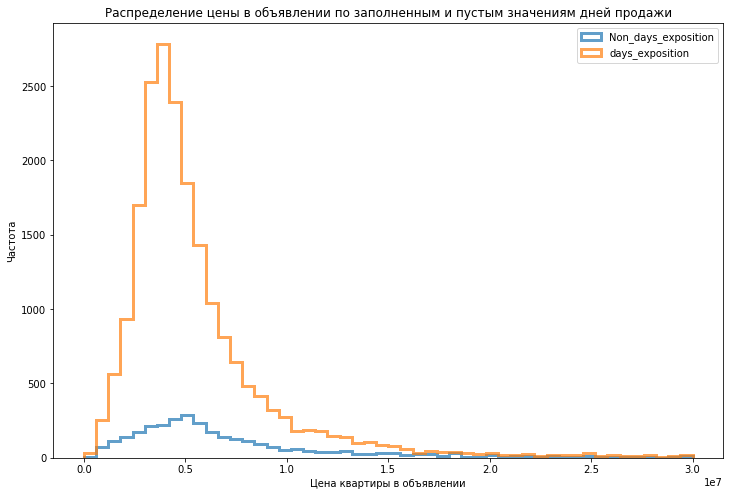

In [33]:
ax = (df[df['days_exposition'].isna()].
      plot(kind='hist', y='last_price', histtype='step', range=(0, 30000000), bins=50, linewidth=3, alpha=0.7, label='Non_days_exposition'))

(df[~df['days_exposition'].isna()]
    .plot(kind='hist', y='last_price', histtype='step', 
    range=(0, 30000000), bins=50, ax=ax, linewidth=3, 
    alpha=0.7, label='days_exposition', figsize=(12,8)))
plt.title('Распределение цены в объявлении по заполненным и пустым значениям дней продажи')
plt.xlabel('Цена квартиры в объявлении')
plt.ylabel('Частота');

Как видим распределение незаполненных значений повторяет структуру заполненных значений в столбце дни продажи, поэтому мы можем удалить пустые значения и они не должны иметь большое влияние на распределение. 

In [34]:
# удалим пустые строки соответствующие рустым значениям количества дней размещения объявлений
df = df.loc[~df['days_exposition'].isna()]
# проверяем корректность удаления
df['days_exposition'].isna().sum()

0

Напишем функцию, которая будет считать значения выбросов минимальное и максимальное для каждого столбца

In [35]:
# функция считает квантили распределения границы для определения выбросов в столбце
def box_plot_values(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
# iqr межквартильный размах
    iqr = q3 - q1 
# границы интервала наиболее вероятных значений min и max
    min_value = q1 - 1.5 * iqr, 
    max_value = q3 + 1.5 * iqr
# считаем количество значений выходящих за границы нормального распредления
    rare_min_value = df.query(f'{column} < @min_value')[column].count()
    rare_max_value = df.query(f'{column} > @max_value')[column].count()
    return print('Столбец', column, '\n' 
                'Первый квартиль = ', q1,'\n' 'Третий квартиль = ', q3,'\n' 'Нижняя граница = ', min_value, '\n' 
                'Верхняя граница = ', max_value, '\n' 'Редкие значения до нижней границы = ', rare_min_value, '\n'
                'Редкие значения выше верхней границы = ', rare_max_value, '\n')

In [36]:
# функция показывает статистику по выбросам и их количеству в каждом из столбцов
box_plot_values(df, 'ceiling_height')
box_plot_values(df, 'total_area')
box_plot_values(df, 'last_price')
box_plot_values(df, 'rooms')

Столбец ceiling_height 
Первый квартиль =  2.6 
Третий квартиль =  2.7 
Нижняя граница =  (2.45,) 
Верхняя граница =  2.8500000000000005 
Редкие значения до нижней границы =  38 
Редкие значения выше верхней границы =  2263 

Столбец total_area 
Первый квартиль =  39.5 
Третий квартиль =  67.8 
Нижняя граница =  (-2.9499999999999957,) 
Верхняя граница =  110.25 
Редкие значения до нижней границы =  0 
Редкие значения выше верхней границы =  1026 

Столбец last_price 
Первый квартиль =  3400000.0 
Третий квартиль =  6500000.0 
Нижняя граница =  (-1250000.0,) 
Верхняя граница =  11150000.0 
Редкие значения до нижней границы =  0 
Редкие значения выше верхней границы =  1681 

Столбец rooms 
Первый квартиль =  1.0 
Третий квартиль =  3.0 
Нижняя граница =  (-2.0,) 
Верхняя граница =  6.0 
Редкие значения до нижней границы =  0 
Редкие значения выше верхней границы =  61 



Построим диаграмму размаха, визульно оценить разброс значений высоты потолка. Начнём с этого столбца, так как столбец имеет самые большие выбросы.

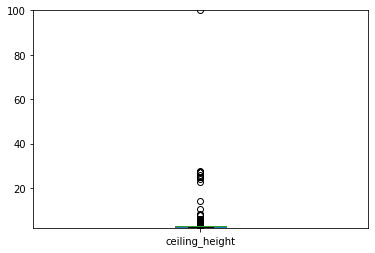

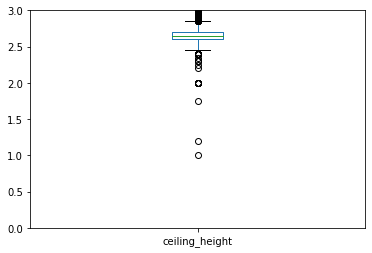

In [37]:
df.plot(kind='box', y='ceiling_height', ylim=(2, 100))
plt.show()
df.plot(kind='box', y='ceiling_height', ylim=(0, 3))
plt.show()

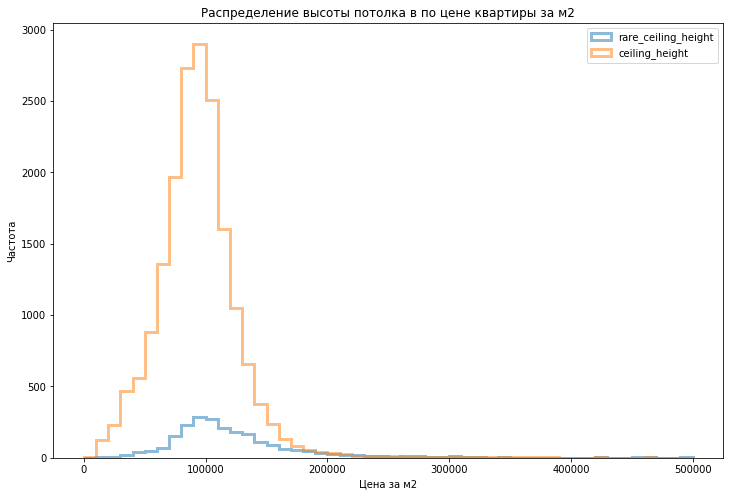

In [62]:
# строим два графика распределения цены за м2 в зависимости от высоты потолка - один с превышающими значениями квартильного размаха, второй
# со значениями, входящими в размах усов боксплота 
ax = (df.query('ceiling_height > 2.85 or ceiling_height < 2.45').
      plot(kind='hist', x = 'ceiling_height', y='price_m2', histtype='step', range=(0, 500000), bins=50, linewidth=3, 
           alpha=0.5, label='rare_ceiling_height'))

(df.query('ceiling_height <= 2.85 & ceiling_height >= 2.45')
 .plot(kind='hist', x = 'ceiling_height',y='price_m2', histtype='step', range=(0, 500000), bins=50, linewidth=3, 
       alpha=0.5, ax=ax, figsize=(12,8), label='ceiling_height'))
plt.title('Распределение высоты потолка в по цене квартиры за м2')
plt.ylabel('Частота')
plt.xlabel('Цена за м2');

Ка мы видим, значений меньше 2,45 очень мало и это явно какие-то выбросы и ошибочные значения, от которых мы можем смело избавиться. Значений больше 3го квартиля намного больше, но как мы видим среди них много также экстремальных значений, которые явно не могут иметь место в квартирах. Подавляющее количество квартир с высотой потолка 2,6-2,7 метра. Также проверили выбросы от цены зв м2, так такое же распределение.

Построим диаграммы размаха по количеству комнат, цене, общей площади.

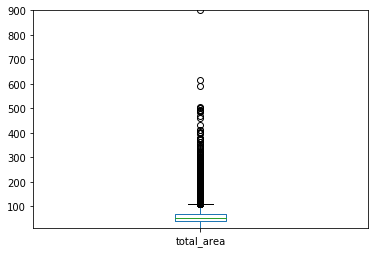

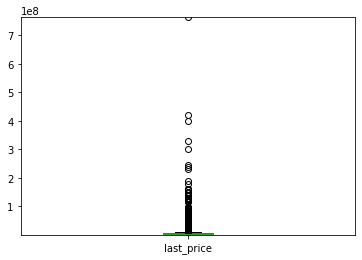

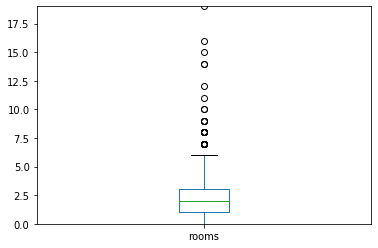

In [39]:
for column in ['total_area', 'last_price', 'rooms']:
    df.plot(kind='box', y=column, ylim=(df[column].min(), df[column].max()))
plt.show()

Удалим выбросы по всем данным исследуемым столбцам. Также в фильтр для удаления добавлю очень малое значения цены, которое явно ошибочно в таблице.

In [40]:
# удалим выбросы по высоте потолка, количеству комнат, цене, площади в новую таблицу, в которой будем вести остальные исследования
df_good = df.query('ceiling_height >= 2.45 & ceiling_height <=2.85 & \
                    last_price > 100000 & last_price <= 11150000 & total_area <= 110.25 & rooms <= 6')

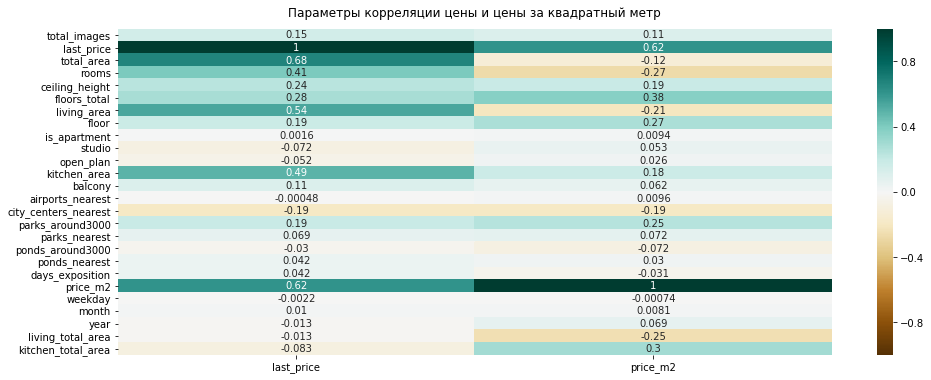

In [41]:
# построим корреляцию цены и других параметров
# Увеличим размер вывода 
plt.figure(figsize=(16, 6)) 
# Сохраним объект тепловой карты в переменной, чтобы легко получить к нему доступ. 
# Задайте диапазон значений для отображения на цветовой карте от -1 до 1 и установите для аннотации (annot) значение True, 
# чтобы отобразить числовые значения корреляции на тепловой карте. 
heatmap = sns.heatmap(df_good.corr()[['last_price','price_m2']], vmin=-1, vmax=1, annot=True, cmap='BrBG') 
# Параметр pad (padding) определяет расстояние заголовка от верхней части тепловой карты. 
heatmap.set_title('Параметры корреляции цены и цены за квадратный метр', fontdict={'fontsize':12}, pad=12);

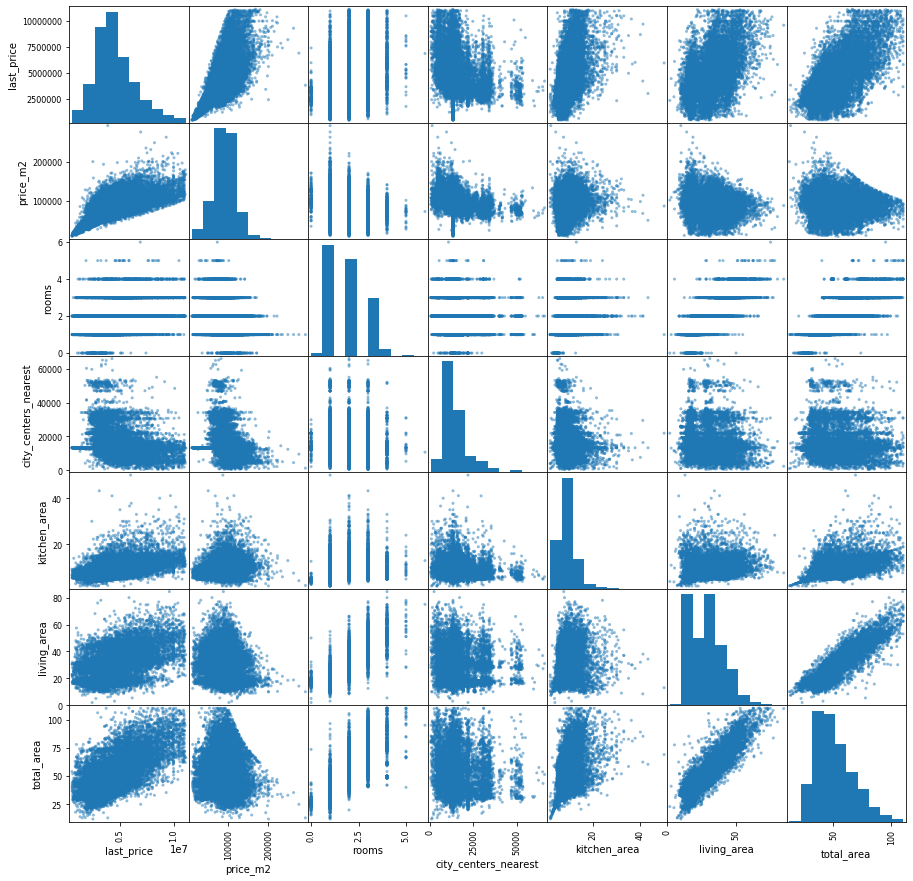

In [42]:
corr_price = (df_good[['last_price', 'price_m2',
                       'rooms', 'city_centers_nearest', 'kitchen_area', 'living_area', 'total_area']])
pd.plotting.scatter_matrix(corr_price, figsize=(15, 15))
plt.show()

* Мы видим самую существенную положительную зависимость цены квартиры и цены за м2, особенно в начальном сегменте недорогих квартир. 
* Наблюдается устойчивая связь между ценой квартиры и площадью общей, жилой и кухонной. Цена квадратный метр имеет свойство снижаться при повышении площади общей, кухонной и жилой. 
* Есть отрицательная связь между количеством комнат и ценой за м2. Чем больше комнат, тем цена за м2 в обшем падает, количество комнат и цена квартиры имеет стойкую положительную связь.
* При расстоянии более 3000 метров от центра населенного пункта, цена за м2 и общая цена не имеют каких либо больших разбросов и сосредоточены в нижнем диапазоне цен.

In [43]:
# строим распределения цен по годам, месяцам и дням недели
date_list_plot = ['year', 'month', 'weekday']
def plot_price(df, column_price, list_column, kind='scatter'):
    for column in list_column:
        df.plot(x=column, y=column_price, kind=kind) 
        plt.title(f'Распределение {column_price} по {column}')
    plt.show()    

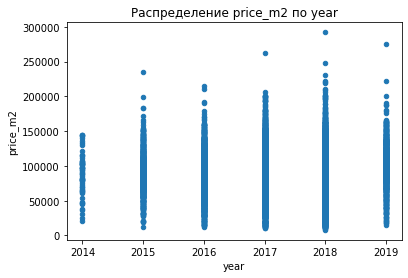

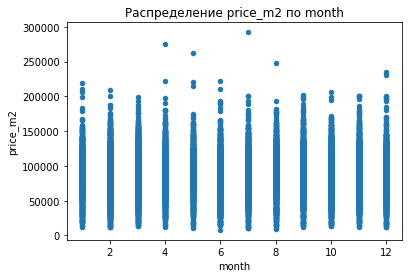

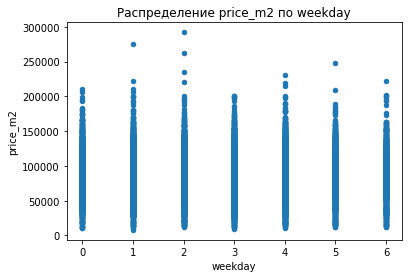

In [44]:
plot_price(df_good,'price_m2', date_list_plot)

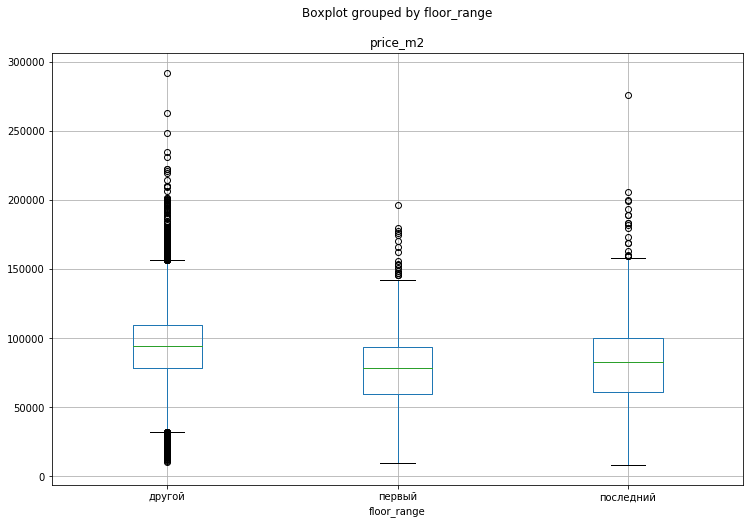

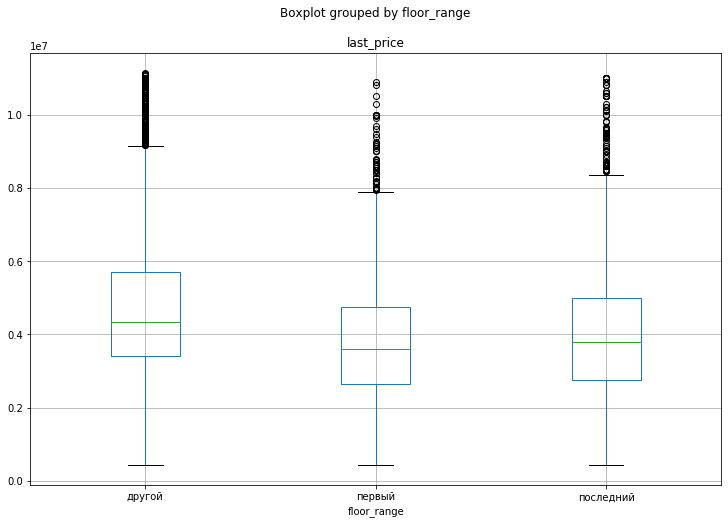

In [45]:
# строим боксплот по цене и цене квадратного метра в отношении этажности квартиры
df_good.boxplot(column='price_m2', by='floor_range',figsize=(12,8))
df_good.boxplot(column='last_price', by='floor_range', figsize=(12,8))
plt.show()

* По годам мы видим, что по цене за квартиры был большой спад в 2014 году, в 2019 году цена немного просела относительно остальных лет. Цена за м2 самая низкая в 2014 году, имеет постепенное увеличение с 2015 по 2018 год, а в 2019 небольшое падение
* По месяцам цена имеет очень небольшие месячные корректировки. По цене за м2 имеет небошой спад в мае и октябре.
* Распределение цена за м2 по дням недели имеет небольшое падение в субботу, продажа догогих квартир по цене м2 имеет тенденцию в среду.
* Цена квартир и цена за м2 на этажах другой получается больше, чем на первом и последнем, а самая маленькая цена за квартиры на 1 этаже.

In [46]:
# забираем по индексу наименования населенного пункта в список
top_10 = df_good['locality_name'].value_counts().head(10).index
# строим сводные данные по цене квадратного метра топ 10 городов
df_good[df_good['locality_name'].isin(top_10)].groupby('locality_name').agg({'price_m2': 'mean'}).sort_values(by='price_m2', ascending=False)

,price_m2
locality_name,
Санкт-Петербург,103376.537957
Пушкин,99028.203125
деревня Кудрово,92488.773649
посёлок Парголово,89671.720930
посёлок Мурино,85729.117647
посёлок Шушары,78052.718204
Колпино,74829.688581
Гатчина,67849.012048
Всеволожск,66855.901538


Самая высокая цена квартир среди населенных пунктов с самым большим количеством объвлений в Санкт-Петербурге и Пушкине, а самая низкая в Выборге и Всеволожске

#### Выделим квартиры в Санкт-Петербурге и выясним, какая область из них входит в центр

In [47]:
# создаем таблицу с данными по Санкт-Петербургу
df_sankt_peterburg = df_good.query('locality_name == "Санкт-Петербург"')

In [48]:
# создаем столбец округленным целым значением км до центра города Санкт-петербурга квартир в объвлениях
df_sankt_peterburg['city_center_km'] = round(df_sankt_peterburg['city_centers_nearest'] / 1000, 0)

In [49]:
# считаем среднюю цену квадратного метра в зависимости от расстояния удаленности от центра в км
mean_price_city_center_km = df_sankt_peterburg.groupby('city_center_km').agg({'price_m2': 'mean'}).reset_index()

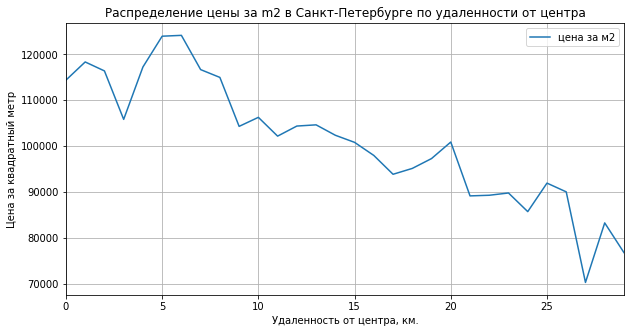

In [50]:
# строим график отношения средней цены от удаленности от центра
mean_price_city_center_km.plot(x='city_center_km', y='price_m2', label='цена за м2',figsize=(10,5))
plt.title('Распределение цены за m2 в Санкт-Петербурге по удаленности от центра')
plt.grid(True)
plt.xlabel('Удаленность от центра, км.')
plt.ylabel('Цена за квадратный метр')
plt.show()

На графике видим, что на 8,5 км меняется структура графика и мы можем обозначить 8,5 км как границу зоны центра.

#### Проанализируем центр города по параметрам площадь, цена, число комнат, высота потолков. Изучим факторы, влияющие на стоимость квартиры. Посмотрим, отличаются ли они об общих выводов по городу.

In [51]:
# добавим столбец, в который запишем центр, если удаленность от центра менее 8 км и отдаление от центра, если более 8 км
# функция вовращающая строку 'центр' или 'отдаление от центра'
def distance(km):
    if km <= 8.5:
        return 'центр'
    else:
        return 'отдаление от центра'   

In [52]:
# добавили столбец с категорией центр или нет
df_sankt_peterburg['category'] = df_sankt_peterburg['city_center_km'].apply(distance)

In [53]:
# смотрим распределение количества квартир по категориям центра
df_sankt_peterburg['category'].value_counts()

отдаление от центра    9210
центр                  1460
Name: category, dtype: int64

In [54]:
# проанализируем параметры площадь, цена за м2, число комнат, высота потолка в категории центр
df_sankt_peterburg.query('category == "центр"')[['total_area', 'price_m2', 'rooms', 'ceiling_height']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,1460.0,58.109979,19.137220,12.00,43.40,56.00,71.00,110.00
price_m2,1460.0,118549.072603,28512.263281,26250.00,98051.00,114453.00,135938.75,292307.00
rooms,1460.0,2.013014,0.872531,0.00,1.00,2.00,3.00,5.00
ceiling_height,1460.0,2.656315,0.075565,2.45,2.65,2.65,2.65,2.85


In [55]:
# выбираем выборку, что относится к центру
df_center = df_sankt_peterburg.query('category == "центр"')

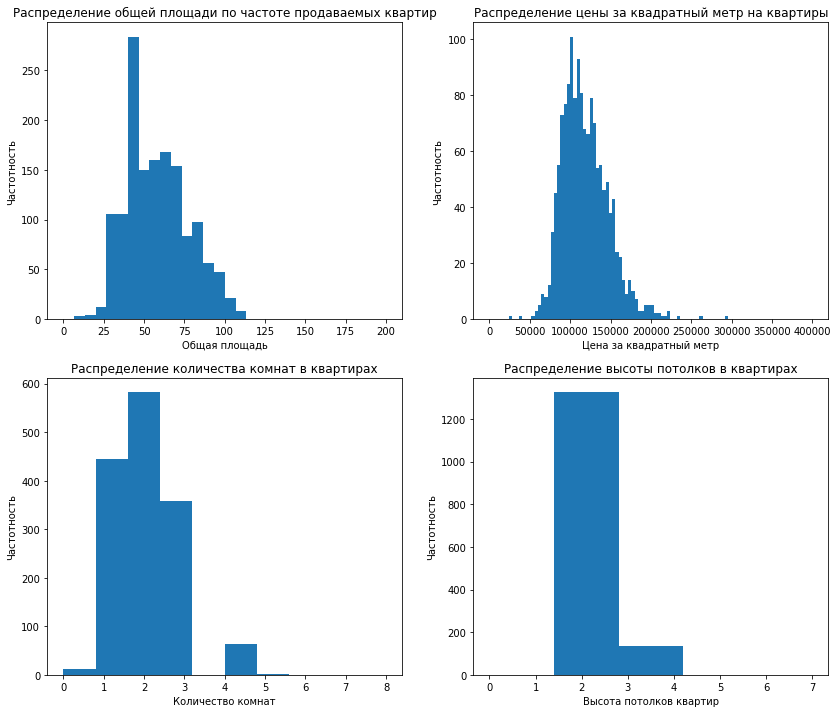

In [56]:
fig, axes = plt.subplots(2 ,2)
fig.set_figwidth(14)
fig.set_figheight(12)

# стоим гистограмму общей площади
flat_hist(df_center, 'total_area', 30, 200, 0, 0, \
          'Распределение общей площади по частоте продаваемых квартир', 'Общая площадь', 'Частотность')

# стоим гистограмму цены за квадратный метр
flat_hist(df_center, 'price_m2', 100, 400000, 0, 1, \
          'Распределение цены за квадратный метр на квартиры', 'Цена за квадратный метр', 'Частотность')

# стоим гистограмму числа комнат
flat_hist(df_center, 'rooms', 10, 8, 1, 0, \
          'Распределение количества комнат в квартирах', 'Количество комнат', 'Частотность')

# стоим гистограмму высоты потолков квартир
flat_hist(df_center, 'ceiling_height', 5, 7, 1, 1, \
          'Распределение высоты потолков в квартирах', 'Высота потолков квартир', 'Частотность')


In [57]:
# добавляем в список для построения количество комнат
date_list_plot.append('rooms')

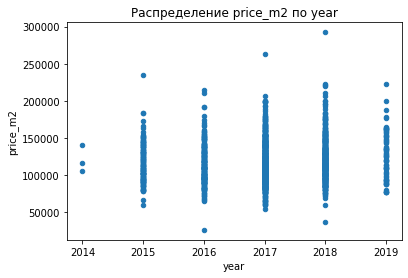

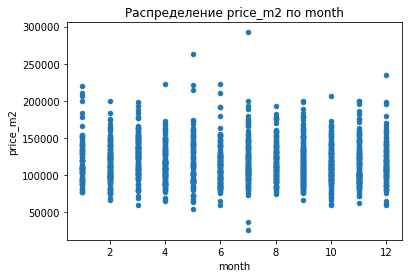

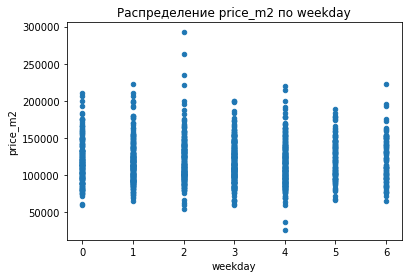

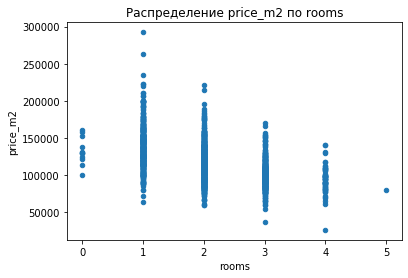

In [58]:
# строим распредение по списку
plot_price(df_center,'price_m2', date_list_plot)

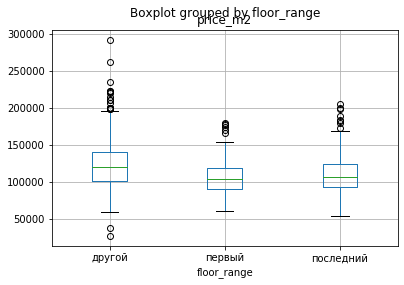

In [59]:
# строим боксплот по цене и цене квадратного метра в отношении этажности квартиры
df_center.boxplot(column='price_m2', by='floor_range')
plt.show()

In [60]:
df_sankt_peterburg.query('category == "отдаление от центра"')['price_m2'].mean()

100971.33702497286

* В центральном сегменте города мы наблюдаем зависимость цены за м2 от этажности - категория между первым и последним этажом самая дорогая, самые дешевые квартиры на первом этаже. Такая же картина с этажностью и в общем сегменте. Стоимость за м2 в центре 1,2-1,4 раза больше, чем в общем по городу.
* Чем больше комнат, тем дешевле стоимость м2. В центральной части города резко отсекается сегмент менее 50000 за м2 по сравнению с общими данными по городу.
* Стоимость квартир в центре города на 20-40% выше, чем в остальной части города. Самые дорогие квартиры на расстоянии 5-6 км от центра города.
* Квартиры в центре большой разброс цен в среду и пятницу, в мае и октябре цены немного ниже, в январе наоборот дорогие, в 2014 году всего несколько сделок, 2015-2018 растёт верхняя планка цены продажи, в 2019 падение. Относительно всех квартир города данные похожи - в 2014 году было падение цены, в мае и октябре тоже совпало по ценам ниже, однако нет тенденции относительно января такой, день недели среда тоже самый разбросанный, в субботу цены продажи ниже за м2.
* Самые продаваемые квартиры общей площадью порядка 40м2, также большая частота от 50- до 75 м2
* Самая частая цена за м2 - 100 000.
* Квартиры в основном продаются одно и двух-комнатные.
* Высота потолков обычно 2,60-2,65.

## Общий вывод

**Мы проанализировали данные архива объявлений о продаже квартир в Санкт-Петербурге и соседних насеенных пунктах за несколько лет и можем выделить, что что квартиры в центре Санкт-Петербурга дороже на 20-50%, чем в остальных частях. Средняя цена за м2 порядка 120 000 в центре. Самые дорогие получаются одно-двух комнатные квартиры не на первом и последних этажах. Стоимость жилья на протяжении периода данных постепенно росла, немного остановившись в 2019 году. На стоимость положительно также влияет площадь кухни и наличие парков**